In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['multiclass-text-classification']


In [19]:
from fastai.text import *

In [20]:
from nltk.corpus import stopwords

def remove_stopwords(input_text):
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split()
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1]
    return " ".join(clean_words)

In [21]:
train = pd.read_csv("../input/multiclass-text-classification/dataset/train_file.csv")
# train['Description'] = train['Description'].str.replace("[^a-zA-Z]", " ")
# train.Description = train.Description.apply(remove_stopwords)
train['Description'].fillna('default text', inplace=True)
train.head()

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location,Category
0,6640280,Construction,1924 10TH AVE E,"Alterations to single family residence, (porti...",ADD/ALT,No plan review,"ZHANG, JERRY",2018-01-16T00:00:00,2018-01-16T00:00:00,NaN,2019-07-16T00:00:00,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.636732,-122.319828,"{'latitude': '47.63673222', 'human_address': '...",SINGLE FAMILY / DUPLEX
1,6452959,Construction,9434 DELRIDGE WAY SW,Change use permit from restaurant to residenti...,ADD/ALT,Plan Review,"MARTIN, TERRY",2015-02-13T00:00:00,2015-04-16T00:00:00,2016-11-15T00:00:00,2016-10-16T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.518298,-122.355555,"{'latitude': '47.51829831', 'human_address': '...",COMMERCIAL
2,6435127,Construction,535 TERRY AVE N,Construct interior alterations to existing off...,ADD/ALT,No plan review,"ALLEXSAHT, REBECCA",2014-09-04T00:00:00,2014-09-04T00:00:00,2015-11-20T00:00:00,2016-03-04T00:00:00,Permit Closed,IA/INTERIOR ARCHITECTS,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.624025,-122.337567,"{'latitude': '47.62402492', 'human_address': '...",COMMERCIAL
3,6620870,Demolition,830 4TH AVE S,need to remove a fire escape that is not part ...,DEMOLITION,Plan Review,"JUNK, FRANK",NaN,NaN,NaN,NaN,Initial Information Collected,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.595020,-122.328530,"{'latitude': '47.59502036', 'human_address': '...",COMMERCIAL
4,6363778,Construction,805 NE 106TH ST,"Channel modification to Thornton Creek, stream...",ADD/ALT,Plan Review,"DANIEL, MARK",2013-05-02T00:00:00,2013-12-19T00:00:00,2015-05-14T00:00:00,2015-06-19T00:00:00,Permit Closed,SEATTLE PARKS DEPT,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.705686,-122.320134,"{'latitude': '47.70568601', 'human_address': '...",COMMERCIAL


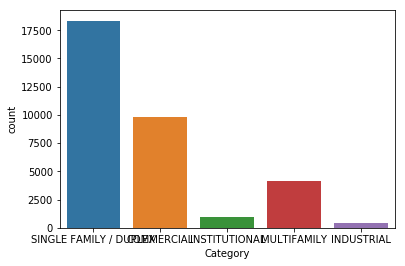

In [22]:
import seaborn as sns
sns.countplot("Category",data=train)


In [26]:
test = pd.read_csv("../input/multiclass-text-classification/dataset/test_file.csv")
# test['text'] = test['text'].str.replace("[^a-zA-Z]", " ")
# test.text = test.text.apply(remove_stopwords)
permit_no = test['Application/Permit Number']
test['Description'].fillna('default text', inplace=True)
test.head()

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location
0,6425384,Construction,8348 18TH AVE NW,"Construct 6' retaining wall to create walkway,...",ADD/ALT,No plan review,"JOSSART, STEVE",2014-07-02T00:00:00,2014-07-02T00:00:00,2015-06-29T00:00:00,2016-01-02T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.690123,-122.379795,"{'latitude': '47.69012273', 'human_address': '..."
1,6496502,Construction,3120 S FRONTENAC ST,Like for like repair of framing at porches of ...,ADD/ALT,No plan review,"RUNDLE, DANIEL",2015-11-12T00:00:00,2015-11-12T00:00:00,2016-02-10T00:00:00,2017-05-12T00:00:00,Permit Closed,SCHULTIS SUNDBERG INC.,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.540111,-122.290535,"{'latitude': '47.54011095', 'human_address': '..."
2,6622347,Demolition,4031 S WILLOW ST,Demolish existing single family dwelling. Subj...,DEMOLITION,No plan review,"WEBER, JULIAN",2017-10-04T00:00:00,NaN,NaN,NaN,Reviews Completed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,3024280.0,47.540470,-122.281410,"{'latitude': '47.54046991', 'human_address': '..."
3,6565685,Construction,3940 1ST AVE NE,Establish use as rowhouse and construct new du...,NEW,Plan Review,"NOVION, SHAUN",2017-02-14T00:00:00,2017-10-20T00:00:00,NaN,2019-04-20T00:00:00,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,3025762.0,47.654986,-122.327467,"{'latitude': '47.65498619', 'human_address': '..."
4,6487370,Construction,5317 BALLARD AVE NW,Tenant improvement to existing women's boutiqu...,ADD/ALT,No plan review,DYNA CONTRACTING INC,2017-07-19T00:00:00,2017-07-19T00:00:00,2018-01-17T00:00:00,2019-01-19T00:00:00,Permit Closed,DYNA CONTRACTING INC,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.666714,-122.383900,"{'latitude': '47.66671437', 'human_address': '..."


In [27]:
# Create databunch
data = (TextList.from_df(train, cols='Description')
                .split_by_rand_pct(0.2)
                .label_for_lm()  
                .databunch(bs=48))
data.show_batch()

idx,text
0,"creek , stream restoration , raised boardwalk stream xxunk , trail restoration and structures , and rain gardens at the xxmaj xxunk xxmaj pond xxmaj natural xxmaj area , per plan.(reviews and processing for 4 a / xxmaj ps under xxunk ) xxbos xxmaj interior tenant improvements to existing commercial building . xxmaj approximately 5000 xxup sf . xxbos xxmaj alterations to install new lighting poles for existing athletic field"
1,"per plan xxbos xxmaj additions and alterations to existing garage to convert into xxmaj detached xxmaj accessory xxmaj dwelling xxmaj unit , per plan . xxbos xxmaj construct townhouse structure with surface parking , per plan . xxbos xxmaj install xxmaj antennas and screen enclosure on roof of existing apartment building and alter garage for equipment room , per plan xxbos xxmaj construct garage accessory to an existing single family"
2,"field inspection , xxup stfi . xxbos xxmaj alterations to xxunk of xxunk units known as 511 , 511 xxunk & xxunk 17th xxmaj ave e , per plans . xxbos xxmaj tenant improvement to existing restaurant subject to field inspection . ( xxup stfi ) xxbos xxmaj interior alterations ( 10th floor , conference room and reception area east of elevator bank ) , subject to field inspection xxbos"
3,"to triplex . xxup sfr converted to triplex without permit . xxbos xxmaj construct xxunk ceiling support , per plan . xxbos xxmaj construct xxmaj west xxmaj duplex , per plan ( xxmaj establish use as townhouse and single family and xxmaj construct ( 1 ) duplex and ( 1 ) single family residence / review and process for 2 aps under xxunk ) . xxbos xxmaj construct garage and"
4,"main floor , and occupy per plan . xxbos xxmaj construct west single family dwelling , per plan . ( xxmaj establish use as townhouse and single family residence and construct one two - family dwelling and three single family residences , per plan / review and process for 4 xxup ap ’s under xxup ap # 6531766 ) . xxbos xxmaj construct xxmaj middle apartment building , occupy per"


**Fit the deep learning model with domain specific data
**

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


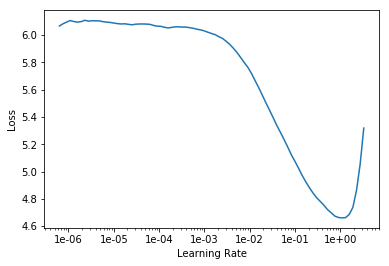

In [28]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3)

# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot()

In [29]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

learn.unfreeze()
learn.fit_one_cycle(5, slice(2e-3/100, 2e-3))

# Save the encoder for use in classification
learn.save_encoder('fine_tuned_enc')

epoch,train_loss,valid_loss,accuracy,time
0,2.716587,2.209832,0.546847,00:17
1,2.090988,1.953464,0.580941,00:17
2,1.910374,1.885491,0.592044,00:17
3,1.801792,1.851996,0.597407,00:17
4,1.735598,1.845666,0.599039,00:16


epoch,train_loss,valid_loss,accuracy,time
0,1.724244,1.819927,0.603154,00:21
1,1.672499,1.780308,0.610577,00:21
2,1.608080,1.754745,0.615854,00:21
3,1.543149,1.743496,0.618727,00:21
4,1.521332,1.742268,0.619151,00:21


**Re-fit model with classification label**

In [31]:
category = {
        'SINGLE FAMILY / DUPLEX': 1,
        'COMMERCIAL': 2,
        'MULTIFAMILY': 3,
        'INSTITUTIONAL': 4,
        'INDUSTRIAL': 5
    }
train['Category'] = train['Category'].apply(lambda a: category[a])


In [33]:
label_cols = ['Category']

test_datalist = TextList.from_df(test, cols='Description', vocab=data.vocab)

data_clas = (TextList.from_df(train, cols='Description', vocab=data.vocab)
             .split_by_rand_pct(0.2)
             .label_from_df(cols= label_cols, classes=[1, 2, 3, 4, 5])
             .add_test(test_datalist)
             .databunch(bs=32))

data_clas.show_batch()

text,target
xxbos xxmaj the proposed project at address xxunk xxup ne xxunk xxmaj st is to construct a two story addition off the existing single family structure . xxmaj the lot at xxunk xxup ne xxunk xxmaj st is 40 ft wide by 61 ft ( xxunk sq ft ) . xxmaj the existing structure is 16 ft x 28 ft ( xxunk sq ft ) and was built with a,1
"xxbos xxmaj alterations to single family floating home , per plans . xxmaj shoreline xxmaj exemption required . xxmaj remove old roofing and xxunk % of xxunk sheathing . xxmaj raise or rebuild xxmaj north wall about 15 & ' higher than existing height . xxmaj place new rafters over existing roof framing xxunk on new north wall height and existing xxunk . xxmaj do same on south gable but",1
"xxbos xxmaj ballard xxmaj kayak proposes to xxunk two concrete kayak launch platforms in moorage space at xxmaj shilshole xxmaj marina for the purpose of xxunk the loading , safety xxunk , launch , xxunk , and removal of xxunk for their kayak xxunk of xxmaj puget xxmaj sound . xxmaj one launch platform is eight feet eight inches ( xxunk ” ) wide and one launch platform is seventeen",2
"xxbos xxmaj remove approximately 600 cubic yards of contaminated soils and 20 cubic yards of contaminated concrete . xxmaj the two concrete pads to be removed are located immediately to the east of the substation building , excavation anticipated to approximately 8 inches xxunk . xxmaj soils will be removed from landscaped areas along w xxmaj xxunk xxmaj st & & 32nd xxmaj ave w to an anticipated depth of",5
xxbos 1 / 31 / 18 xxup hud . xxup cancelled xxup iaw xxup sbc 106.6.9 . xxup lfd / 2 / 4 / 14 xxup extension xxup july 2014 7 / 28 / 2011 xxup hud . ( 2 / 24 / 2012 xxup xxunk . xxup further ) xxup extension xxup granted xxup pending xxup row xxup xxunk xxup and xxup council xxup action . xxup lfd xxup,5


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


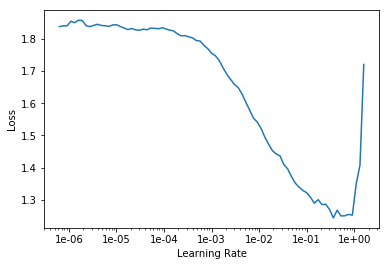

In [34]:

learn_classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

# load the encoder saved  
learn_classifier.load_encoder('fine_tuned_enc')
learn_classifier.freeze()

# select the appropriate learning rate
learn_classifier.lr_find()

# we typically find the point where the slope is steepest
learn_classifier.recorder.plot()

In [35]:
# Fit the model based on selected learning rate
learn_classifier.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

learn_classifier.unfreeze()
learn_classifier.fit_one_cycle(5, slice(2e-3/100, 2e-3))

learn_classifier.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,0.580874,0.482966,0.830028,00:16
1,0.625954,0.452880,0.839869,00:15
2,0.575981,0.414985,0.854779,00:16
3,0.573552,0.430807,0.850007,00:16
4,0.478065,0.399067,0.858506,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.431308,0.375018,0.870136,00:32
1,0.376521,0.345765,0.881318,00:34
2,0.346025,0.325936,0.884449,00:33
3,0.309166,0.326027,0.887431,00:32
4,0.288028,0.324688,0.887729,00:32


text,target,prediction
"xxbos xxmaj this project will repair pavement areas along the north end of xxmaj terminal 18 . xxmaj there are two work areas , one on the west edge of the wharf ( approximately 360 xxup sf ) and one to the west of the wharf along the north side of the terminal ( approximately 700 xxup sf ) . xxmaj all work will be conducted from either xxunk ,",5,5
"xxbos xxmaj removal of fire ladder -- the building has a simple xxunk fire ladder ( no xxunk ) xxunk to the front of the building . xxmaj we want to remove it because xxunk are climbing up it to xxunk the roof , xxunk , and xxunk xxunk , all of which we have found xxunk of . xxmaj we xxunk found xxunk xxunk on the xxunk roof .",3,2
"xxbos xxmaj we are applying for an environmental waiver ( known slide area ) to replace an existing 2-story wooden deck , which is 31 years old , with a new deck in the xxunk existing configuration and using existing concrete footings . xxmaj the deck is at the end of its xxunk , with rot in the xxunk . xxmaj we have already replaced xxunk rotted posts , railings",1,1
xxbos xxup phase 1 xxup of 2 - xxup construction xxup of xxup five ( 5 ) xxup new xxup 3-story xxup condominium xxup towers xxup for 43 xxup units xxup with xxup common xxup underground xxup parking / xxup excavation + xxup foundation xxup only xxup this xxup permit xxup per xxup plan + xxup mup # xxup xxunk 4 / 14 / 2010 xxup cancelled xxup application xxup,3,3
"xxbos xxmaj this permit is related to permit number xxunk , and was last inspected for framing on 11 / 2 / 16 by inspector xxmaj xxunk . xxmaj we accessed the basement storage area and installed a walk - in cooler . xxmaj the xxunk work was performed by xxmaj xxunk xxmaj service , xxunk is a licensed xxunk a city of xxmaj seattle xxunk contractor . xxmaj xxunk",2,5


**Get predictions**

In [36]:

preds, target = learn_classifier.get_preds(DatasetType.Test, ordered=True)
predictions = np.array(np.argmax(preds, axis=1) + 1)

test['Category'] = predictions
test.head()

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location,Category
0,6425384,Construction,8348 18TH AVE NW,"Construct 6' retaining wall to create walkway,...",ADD/ALT,No plan review,"JOSSART, STEVE",2014-07-02T00:00:00,2014-07-02T00:00:00,2015-06-29T00:00:00,2016-01-02T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.690123,-122.379795,"{'latitude': '47.69012273', 'human_address': '...",1
1,6496502,Construction,3120 S FRONTENAC ST,Like for like repair of framing at porches of ...,ADD/ALT,No plan review,"RUNDLE, DANIEL",2015-11-12T00:00:00,2015-11-12T00:00:00,2016-02-10T00:00:00,2017-05-12T00:00:00,Permit Closed,SCHULTIS SUNDBERG INC.,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.540111,-122.290535,"{'latitude': '47.54011095', 'human_address': '...",1
2,6622347,Demolition,4031 S WILLOW ST,Demolish existing single family dwelling. Subj...,DEMOLITION,No plan review,"WEBER, JULIAN",2017-10-04T00:00:00,NaN,NaN,NaN,Reviews Completed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,3024280.0,47.540470,-122.281410,"{'latitude': '47.54046991', 'human_address': '...",1
3,6565685,Construction,3940 1ST AVE NE,Establish use as rowhouse and construct new du...,NEW,Plan Review,"NOVION, SHAUN",2017-02-14T00:00:00,2017-10-20T00:00:00,NaN,2019-04-20T00:00:00,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,3025762.0,47.654986,-122.327467,"{'latitude': '47.65498619', 'human_address': '...",1
4,6487370,Construction,5317 BALLARD AVE NW,Tenant improvement to existing women's boutiqu...,ADD/ALT,No plan review,DYNA CONTRACTING INC,2017-07-19T00:00:00,2017-07-19T00:00:00,2018-01-17T00:00:00,2019-01-19T00:00:00,Permit Closed,DYNA CONTRACTING INC,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.666714,-122.383900,"{'latitude': '47.66671437', 'human_address': '...",2


In [37]:
category = {
        1: 'SINGLE FAMILY / DUPLEX',
        2: 'COMMERCIAL',
        3: 'MULTIFAMILY',
        4: 'INSTITUTIONAL',
        5: 'INDUSTRIAL'
    }
predict = test['Category'].apply(lambda a: category[a])

In [38]:
submission = pd.DataFrame({'Application/Permit Number': permit_no})
submission = pd.concat([submission, pd.DataFrame(predict, columns = label_cols)], axis=1)

submission.to_csv('submission.csv', index=False)
submission.tail()

,Application/Permit Number,Category
22355,6284796,COMMERCIAL
22356,6242102,COMMERCIAL
22357,6593264,SINGLE FAMILY / DUPLEX
22358,6440664,COMMERCIAL
22359,6264853,COMMERCIAL


In [39]:
## To download the submission file without Commiting the kernel.
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "fastai_submission.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission)